In [ ]:
%pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import classification_report,auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,  LabelBinarizer, MinMaxScaler

In [2]:
import pandas as pd

df = pd.read_csv('/Users/chauthanhuy/Downloads/PiHome.csv', header = 0, sep = ',')

In [3]:
df.describe()

,Churn,CustomerID,HourSpendOnApp,NumberOfPeople,RatingOnApp,HourSolvingProblem,Complain,NumberOfIntegratedFeatures,NumberOfUsingService,TotalHourContact
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5285.000000,4779.000000,5630.000000
mean,0.210302,52815.500000,2.846181,3.253108,3.066785,4.214032,0.284902,1.540208,3.124503,177.221492
std,0.407559,1625.385339,0.809518,0.786536,1.380194,2.583586,0.451408,1.361350,1.371000,49.193869
min,0.000000,50001.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,51408.250000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,2.000000,146.000000
50%,0.000000,52815.500000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,3.000000,163.000000
75%,0.000000,54222.750000,3.000000,4.000000,4.000000,6.000000,1.000000,2.000000,4.000000,196.000000
max,1.000000,55630.000000,5.000000,4.000000,5.000000,22.000000,1.000000,6.000000,6.000000,325.000000


In [4]:
df.describe(include = object)

,Gender,MaritalStatus,OwnerProduct,PreferredPaymentMode,PiHomeProduct
count,5630,5630,5630,5630,5630
unique,2,3,3,4,3
top,Male,Married,Unit,Debit Card,BMS
freq,3384,2986,2765,2314,2859


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Churn                       5630 non-null   int64  
 1   CustomerID                  5630 non-null   int64  
 2   Gender                      5630 non-null   object 
 3   MaritalStatus               5630 non-null   object 
 4   OwnerProduct                5630 non-null   object 
 5   PreferredPaymentMode        5630 non-null   object 
 6   HourSpendOnApp              5630 non-null   int64  
 7   NumberOfPeople              5630 non-null   int64  
 8   PiHomeProduct               5630 non-null   object 
 9   RatingOnApp                 5630 non-null   int64  
 10  HourSolvingProblem          5630 non-null   int64  
 11  Complain                    5630 non-null   int64  
 12  NumberOfIntegratedFeatures  5285 non-null   float64
 13  NumberOfUsingService        4779 

In [6]:
df = df.drop(['CustomerID', 'Gender', 'MaritalStatus'], axis=1)

In [7]:
df.dtypes

Churn                           int64
OwnerProduct                   object
PreferredPaymentMode           object
HourSpendOnApp                  int64
NumberOfPeople                  int64
PiHomeProduct                  object
RatingOnApp                     int64
HourSolvingProblem              int64
Complain                        int64
NumberOfIntegratedFeatures    float64
NumberOfUsingService          float64
TotalHourContact                int64
dtype: object

In [8]:
df.isnull().sum()


Churn                           0
OwnerProduct                    0
PreferredPaymentMode            0
HourSpendOnApp                  0
NumberOfPeople                  0
PiHomeProduct                   0
RatingOnApp                     0
HourSolvingProblem              0
Complain                        0
NumberOfIntegratedFeatures    345
NumberOfUsingService          851
TotalHourContact                0
dtype: int64

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total']>0]

,Total,%
NumberOfUsingService,851,15.1
NumberOfIntegratedFeatures,345,6.1


In [10]:
# Điền giá trị trung vị cho các cột liên tục
#df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
#df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean(), inplace=True)
#df['Tenure'].fillna(df['Tenure'].median(), inplace=True)

# Điền mode cho các cột rời rạc
df['NumberOfUsingService'].fillna(df['NumberOfUsingService'].mode()[0], inplace=True)
df['NumberOfIntegratedFeatures'].fillna(df['NumberOfIntegratedFeatures'].mode()[0], inplace=True)

# Kiểm tra lại missing data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


Series([], dtype: int64)


In [11]:
#df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)


In [12]:
df.isnull().sum()

Churn                         0
OwnerProduct                  0
PreferredPaymentMode          0
HourSpendOnApp                0
NumberOfPeople                0
PiHomeProduct                 0
RatingOnApp                   0
HourSolvingProblem            0
Complain                      0
NumberOfIntegratedFeatures    0
NumberOfUsingService          0
TotalHourContact              0
dtype: int64

In [13]:
# Categorical variables
cat_features = [
    'OwnerProduct',
    'PreferredPaymentMode',
    'PiHomeProduct',
    'Complain'
]

# Numerical variables
num_features = [
    'HourSpendOnApp',
    'NumberOfPeople',
    'RatingOnApp',
    'HourSolvingProblem',
    'NumberOfIntegratedFeatures',
    'NumberOfUsingService',
    'TotalHourContact'
]

### EDA

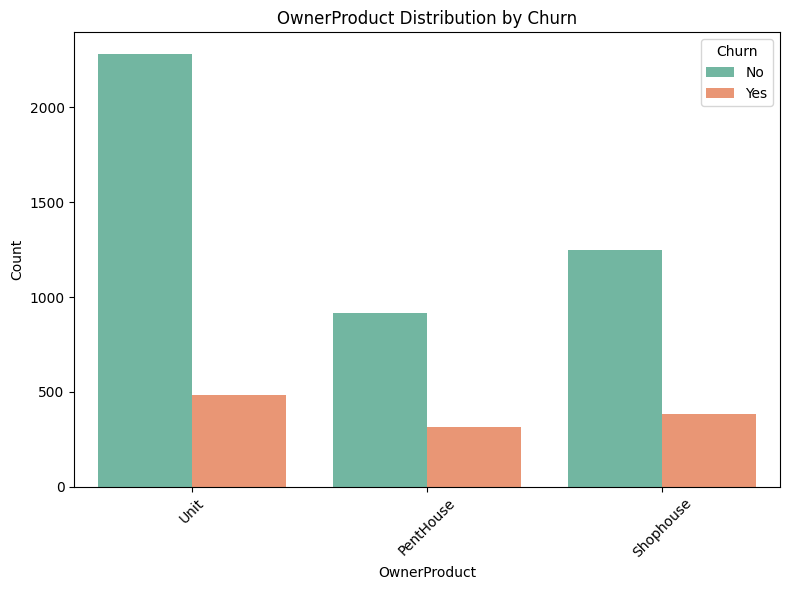

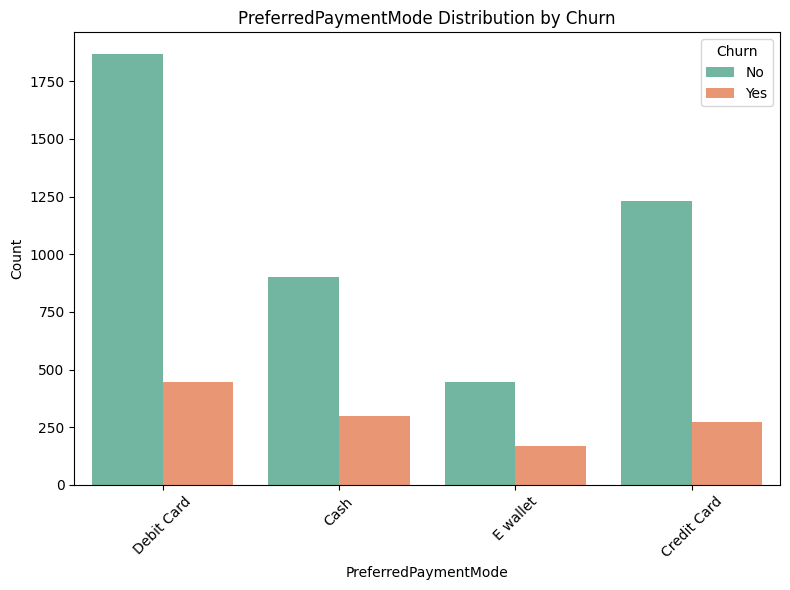

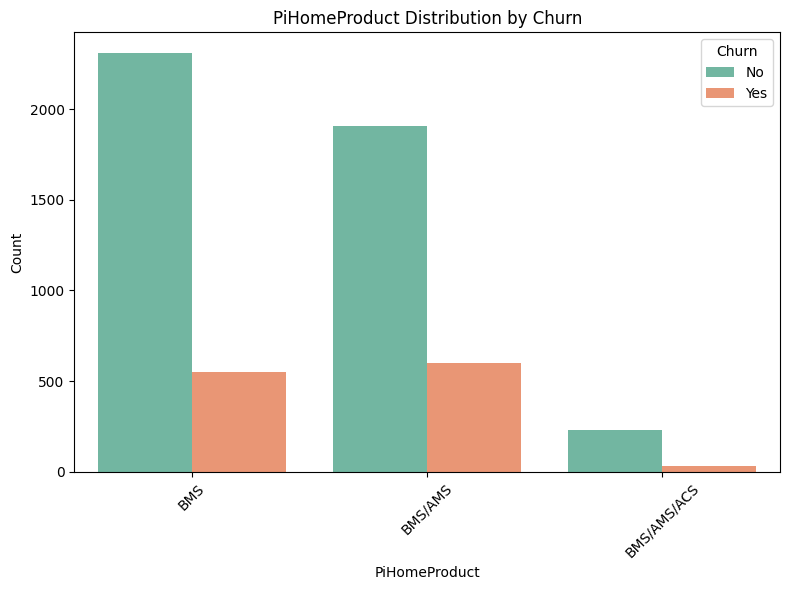

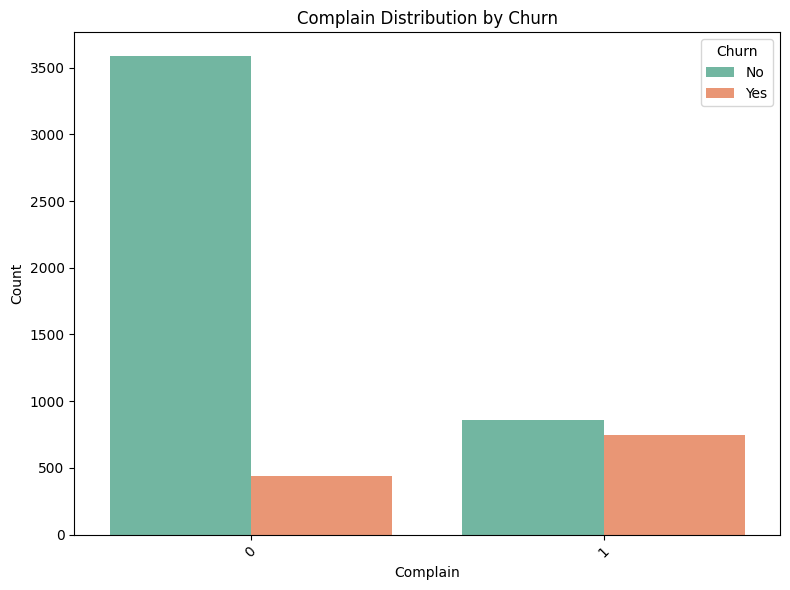

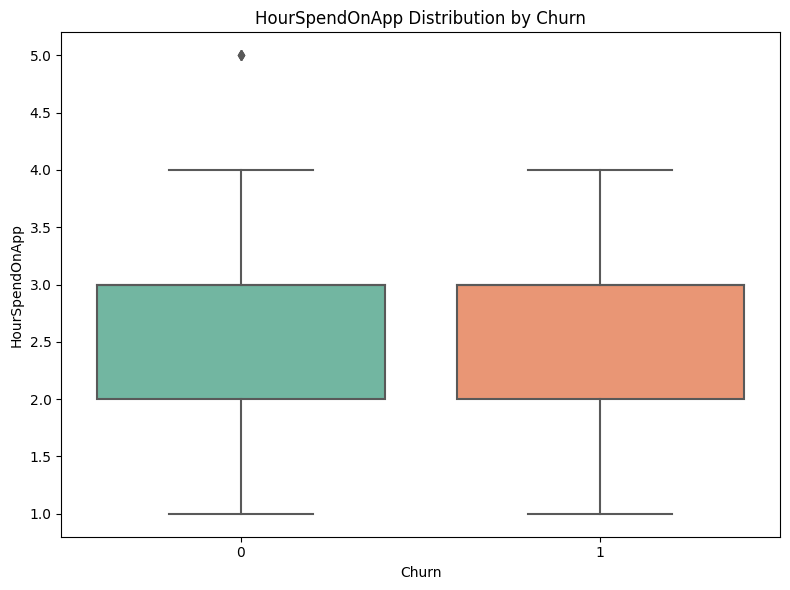

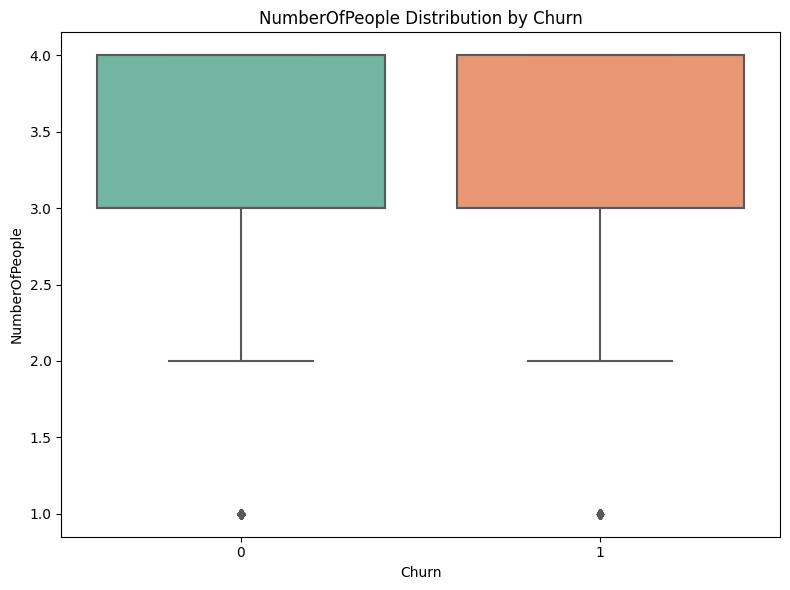

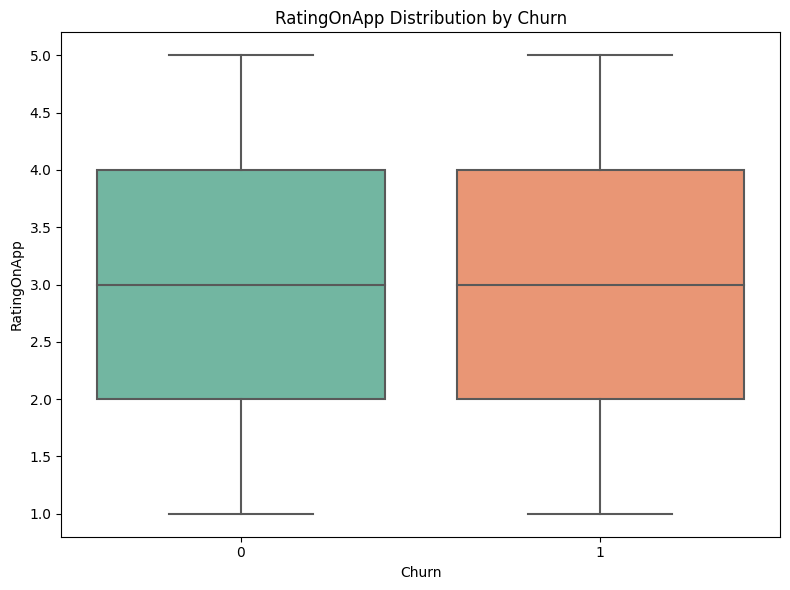

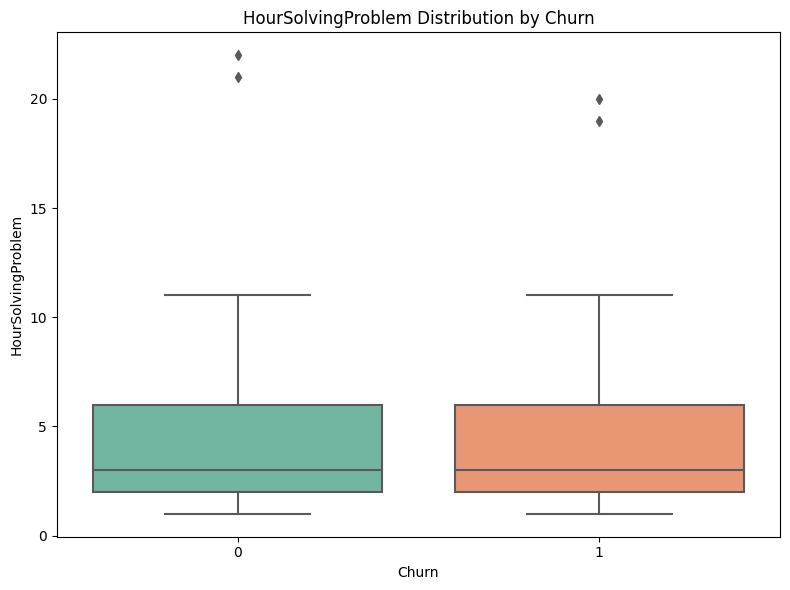

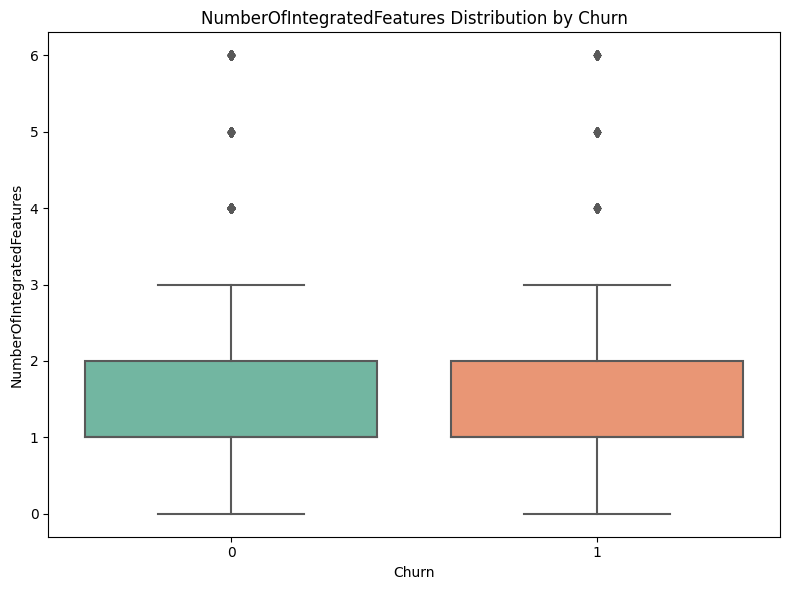

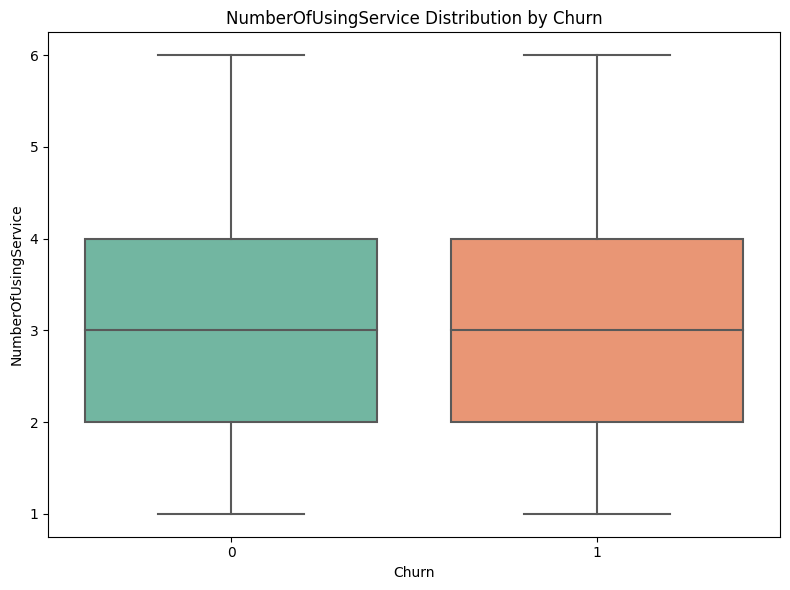

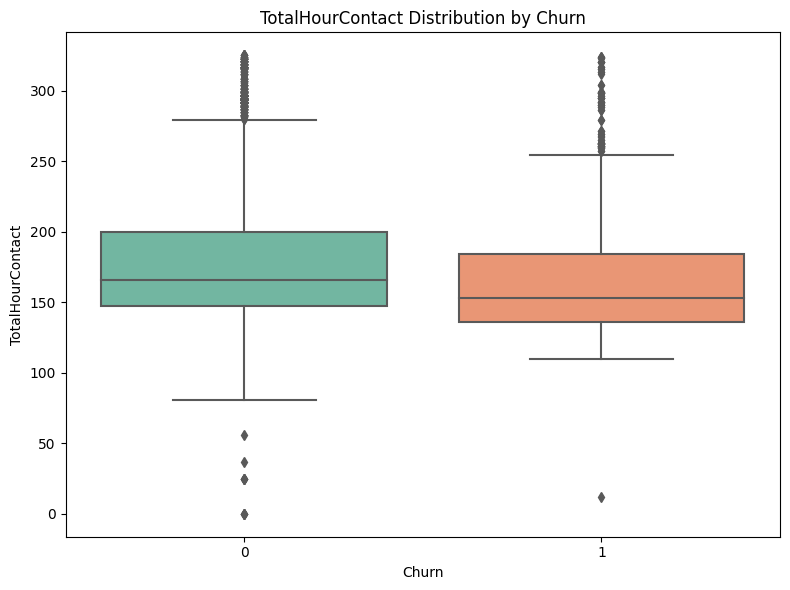

In [14]:
# Import các thư viện cần thiết
import seaborn as sns
import matplotlib.pyplot as plt

# Xác định các biến phân loại và biến số
categorical_vars = ["OwnerProduct", "PreferredPaymentMode", "PiHomeProduct", "Complain"]
numerical_vars = [
    "HourSpendOnApp", "NumberOfPeople", "RatingOnApp", 
    "HourSolvingProblem", "NumberOfIntegratedFeatures", 
    "NumberOfUsingService", "TotalHourContact"
]

# Vẽ biểu đồ cho các biến phân loại
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue="Churn", palette="Set2")
    plt.title(f"{var} Distribution by Churn")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ cho các biến số
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="Churn", y=var, palette="Set2")
    plt.title(f"{var} Distribution by Churn")
    plt.xlabel("Churn")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


Number of numeric fields:  9


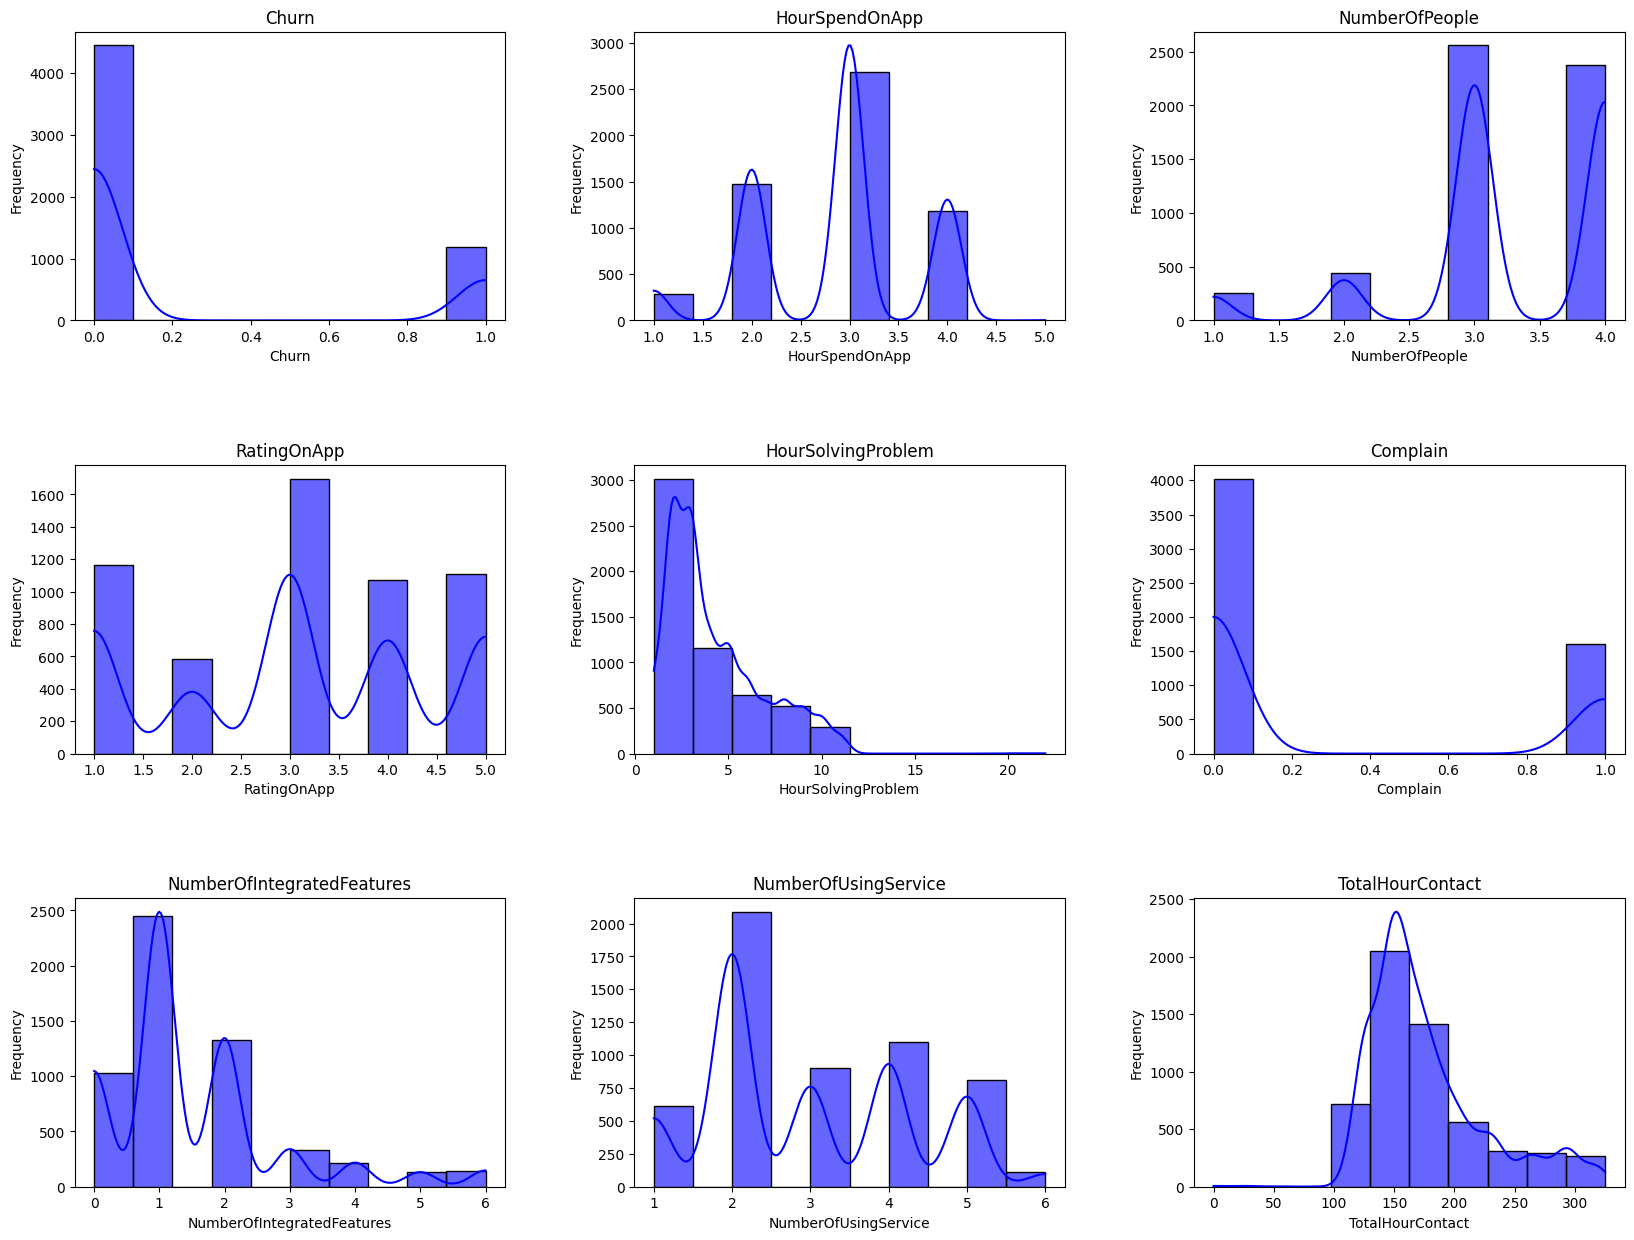

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Tắt cảnh báo FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Lọc các cột numeric
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    """
    Vẽ biểu đồ phân phối cho một cột số liệu
    """
    sns.histplot(data=df, x=col, bins=bins, kde=kde, color='blue', alpha=0.6)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins=10):
    """
    Vẽ biểu đồ phân phối cho các cột số liệu
    - numeric_cols: danh sách các cột số liệu
    - row, col: số lượng dòng và cột trong lưới đồ thị
    - figsize: kích thước của toàn bộ biểu đồ
    - bins: số lượng bins trong biểu đồ histogram
    """
    print('Number of numeric fields: ', len(numeric_cols))
    
    # Kiểm tra nếu số cột nhiều hơn số ô trong grid, tăng số dòng hoặc cột.
    total_plots = len(numeric_cols)
    grid_size = row * col
    if total_plots > grid_size:
        row = (total_plots + col - 1) // col  # Tăng số dòng để đủ chỗ cho biểu đồ

    # Tạo figure và lưới
    plt.figure(figsize=figsize)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    
    # Vẽ biểu đồ cho từng cột
    for i, col_name in enumerate(numeric_cols, 1):
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, col_name, bins=bins)
        plt.title(col_name, fontsize=12)
        plt.xlabel(col_name, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    
    plt.show()

# Gọi hàm với DataFrame và danh sách các cột numeric
_distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins=10)


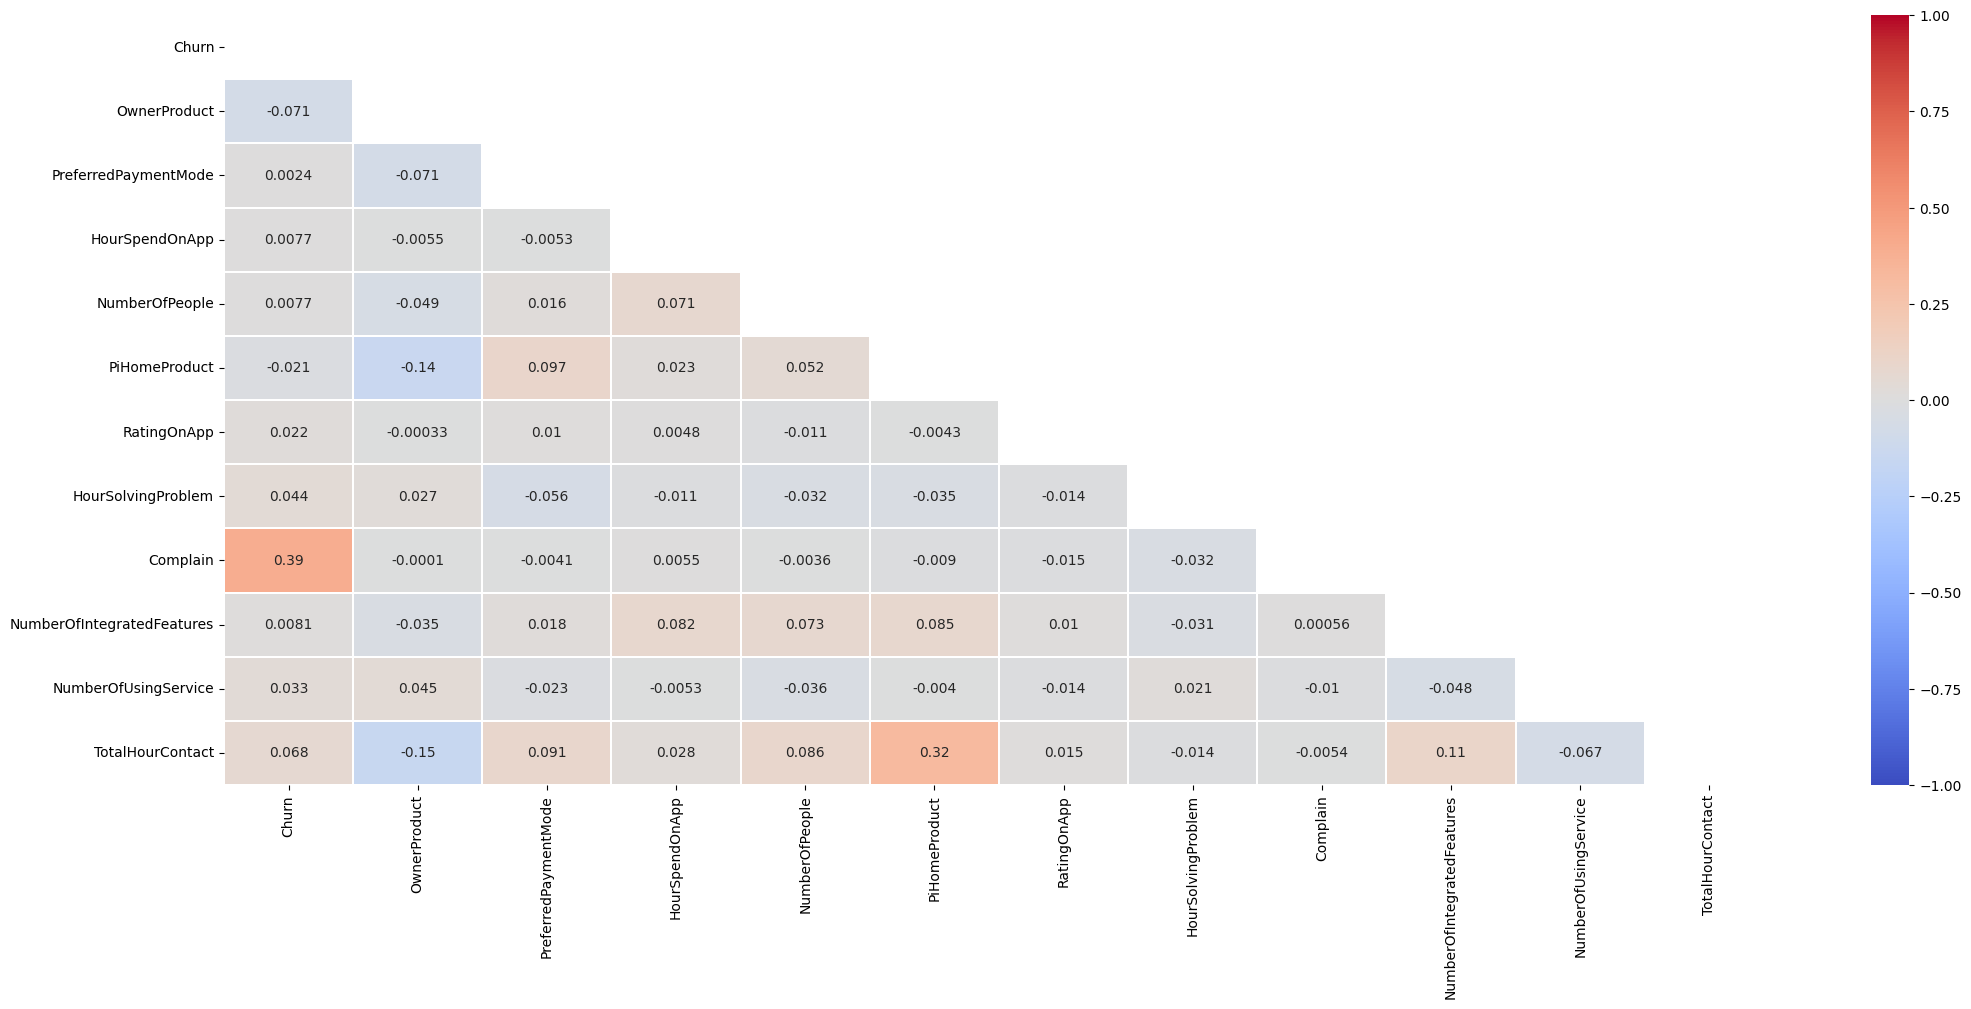

In [16]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [19]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Churn,OwnerProduct,PreferredPaymentMode,HourSpendOnApp,NumberOfPeople,PiHomeProduct,RatingOnApp,HourSolvingProblem,Complain,NumberOfIntegratedFeatures,NumberOfUsingService,TotalHourContact
0,1,2,2,3,3,0,2,9,1,1.0,5.0,160
1,1,0,0,3,4,0,3,7,1,0.0,4.0,121
2,1,0,2,2,4,0,3,6,1,0.0,3.0,120
3,1,0,2,2,4,0,5,8,0,0.0,3.0,134
4,1,0,0,1,3,0,5,3,0,1.0,3.0,130


In [20]:
df_encoded = pd.get_dummies(df, columns=cat_features)

label_encoder = LabelEncoder()
df_encoded = df.copy()

for feature in cat_features:
    df_encoded[feature] = label_encoder.fit_transform(df[feature])

In [21]:
df_encoded

,Churn,OwnerProduct,PreferredPaymentMode,HourSpendOnApp,NumberOfPeople,PiHomeProduct,RatingOnApp,HourSolvingProblem,Complain,NumberOfIntegratedFeatures,NumberOfUsingService,TotalHourContact
0,1,2,2,3,3,0,2,9,1,1.0,5.0,160
1,1,0,0,3,4,0,3,7,1,0.0,4.0,121
2,1,0,2,2,4,0,3,6,1,0.0,3.0,120
3,1,0,2,2,4,0,5,8,0,0.0,3.0,134
4,1,0,0,1,3,0,5,3,0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,1,1,3,2,0,1,6,0,1.0,2.0,151
5626,0,2,1,3,3,1,5,6,0,1.0,2.0,225
5627,1,2,2,3,2,0,4,3,1,1.0,2.0,186
5628,0,1,1,4,3,0,4,4,0,2.0,5.0,179


In [22]:
scaler = MinMaxScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

In [23]:
df_combined = pd.concat([df_encoded, df[num_features]], axis=1)
df_encoded.head(10)

,Churn,OwnerProduct,PreferredPaymentMode,HourSpendOnApp,NumberOfPeople,PiHomeProduct,RatingOnApp,HourSolvingProblem,Complain,NumberOfIntegratedFeatures,NumberOfUsingService,TotalHourContact
0,1,2,2,0.50,0.666667,0,0.25,0.380952,1,0.166667,0.8,0.492308
1,1,0,0,0.50,1.000000,0,0.50,0.285714,1,0.000000,0.6,0.372308
2,1,0,2,0.25,1.000000,0,0.50,0.238095,1,0.000000,0.4,0.369231
3,1,0,2,0.25,1.000000,0,1.00,0.333333,0,0.000000,0.4,0.412308
4,1,0,0,0.00,0.666667,0,1.00,0.095238,0,0.166667,0.4,0.400000
5,1,1,2,0.50,0.666667,1,1.00,0.047619,1,0.666667,0.2,0.427692
6,1,0,0,0.25,0.666667,0,0.25,0.142857,0,0.000000,0.6,0.372308
7,1,0,0,0.50,0.666667,0,0.25,0.095238,1,0.333333,0.6,0.378462
8,1,0,3,0.00,1.000000,0,0.50,0.047619,1,0.000000,0.2,0.390769
9,1,0,2,0.25,0.666667,0,0.50,0.047619,0,0.166667,0.0,0.378462


In [24]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn                         1.000000
Complain                      0.392696
RatingOnApp                   0.052403
NumberOfUsingService          0.021646
PiHomeProduct                 0.020662
PreferredPaymentMode         -0.004773
NumberOfPeople               -0.005919
NumberOfIntegratedFeatures   -0.006056
HourSolvingProblem           -0.017616
HourSpendOnApp               -0.018781
OwnerProduct                 -0.084526
TotalHourContact             -0.111771
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [25]:
df_encoded.Churn.value_counts()

Churn
0    4446
1    1184
Name: count, dtype: int64

In [26]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#smote = SMOTE(random_state=42)
#X, y = smote.fit_resample(X, y)

#from collections import Counter
#print("Sau SMOTE:", Counter(y))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [29]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [30]:
# Lọc các cột numeric
#numeric_cols = df.select_dtypes(include=['float', 'int']).columns

#def distplot(col, df, bins=10, kde=True):

    #plt.figure(figsize=(8, 6))
    #sns.histplot(data=df, x=col, bins=bins, kde=kde, color='blue', alpha=0.6)
    #plt.title(f"Distribution of {col}")
    #plt.xlabel(col)
    #plt.ylabel("Frequency")
    #plt.show()

# Duyệt qua các cột số liệu và vẽ biểu đồ cho mỗi cột
#for feat in numeric_cols:
    #distplot(feat, df, bins=10, kde=True)

In [31]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [32]:
#from collections import Counter
#print("Sau SMOTE:", Counter(y_train))

## TRAIN MODEL

### Logistic Regression

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [34]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7175843694493783


In [35]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1334
           1       0.40      0.67      0.50       355

    accuracy                           0.72      1689
   macro avg       0.64      0.70      0.65      1689
weighted avg       0.79      0.72      0.74      1689



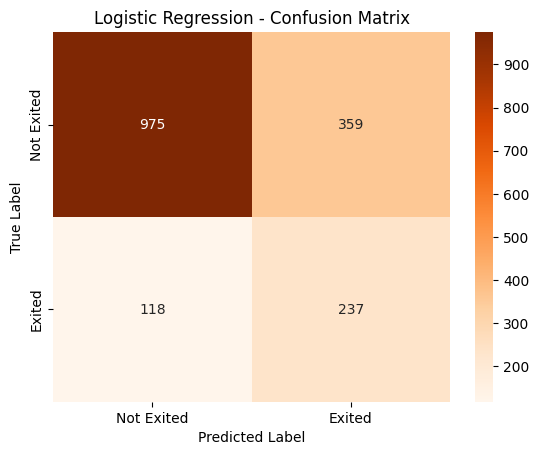

In [36]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, lr_pred, labels=[0, 1])

# Vẽ ma trận nhầm lẫn bằng seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])

# Thêm tiêu đề và nhãn trục
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Hiển thị biểu đồ
plt.show()

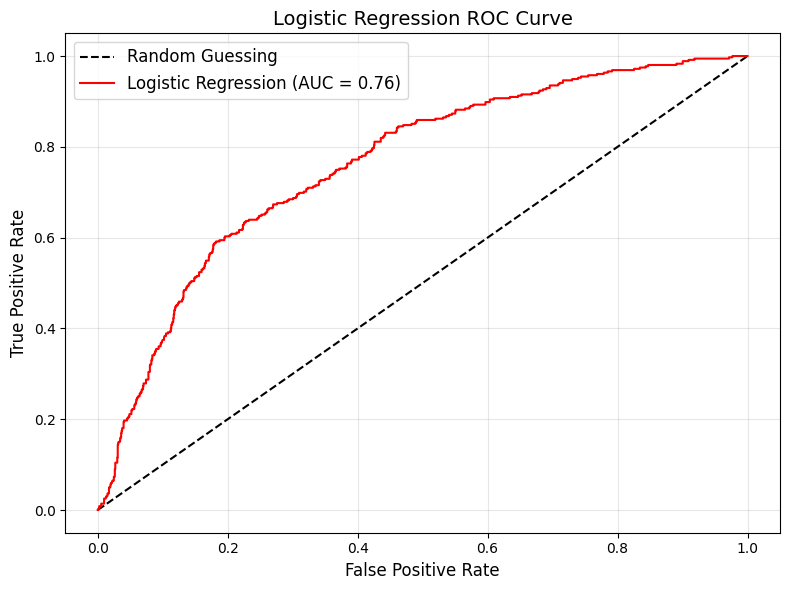

AUC (Area Under the Curve): 0.7618


In [51]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Tính xác suất dự đoán
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

# Tính FPR, TPR và thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Tính AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})', color='r')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Logistic Regression ROC Curve', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# In giá trị AUC
print(f"AUC (Area Under the Curve): {auc:.4f}")

In [38]:
# Kết quả thực tế và dự đoán
y_pred = lr_model.predict(X)

# Đếm số lượng Exited (1) và Not Exited (0) trong kết quả thực tế
actual_counts = np.bincount(y)
predicted_counts = np.bincount(y_pred)

# Hiển thị kết quả
print("Kết quả thực tế:")
print(f"Not Exited (0): {actual_counts[0]} - Exited (1): {actual_counts[1]}")

print("\nKết quả dự đoán:")
print(f"Not Exited (0): {predicted_counts[0]} - Exited (1): {predicted_counts[1]}")

Kết quả thực tế:
Not Exited (0): 4446 - Exited (1): 1184

Kết quả dự đoán:
Not Exited (0): 3598 - Exited (1): 2032


In [39]:
from sklearn.model_selection import GridSearchCV
# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV to find the best hyperparameters
DT = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
DT.fit(X_train, y_train)

# Get the best hyperparameters
best_params = DT.best_params_

# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
DT_pred = best_dt_classifier.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, DT_pred))

# Evaluate the model
DT_SC = accuracy_score(y_test, DT_pred)
print(f"{round(DT_SC*100,2)}% Accurate")
print("Best Hyperparameters:", best_params)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1334
           1       0.61      0.68      0.64       355

    accuracy                           0.84      1689
   macro avg       0.76      0.78      0.77      1689
weighted avg       0.85      0.84      0.85      1689

84.25% Accurate
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Decision Tree

In [40]:
best_decision_tree = DT.best_estimator_

# Lấy thông tin về cây quyết định
tree_structure = best_decision_tree.tree_
number_of_nodes = tree_structure.node_count

print("Number of Nodes in the Best Decision Tree:", number_of_nodes)

Number of Nodes in the Best Decision Tree: 1563


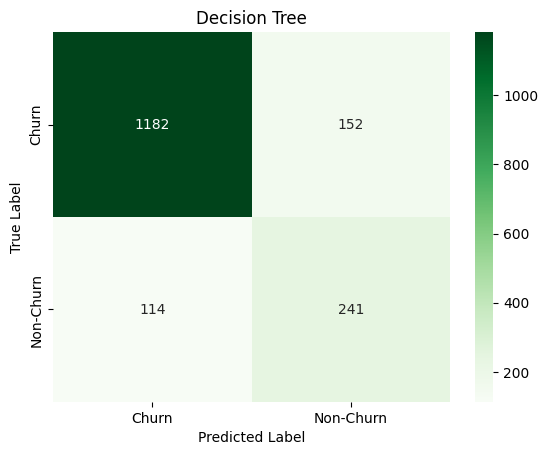

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, DT_pred, labels=[False, True])

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Churn','Non-Churn'],
            yticklabels=['Churn','Non-Churn'])

plt.title('Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

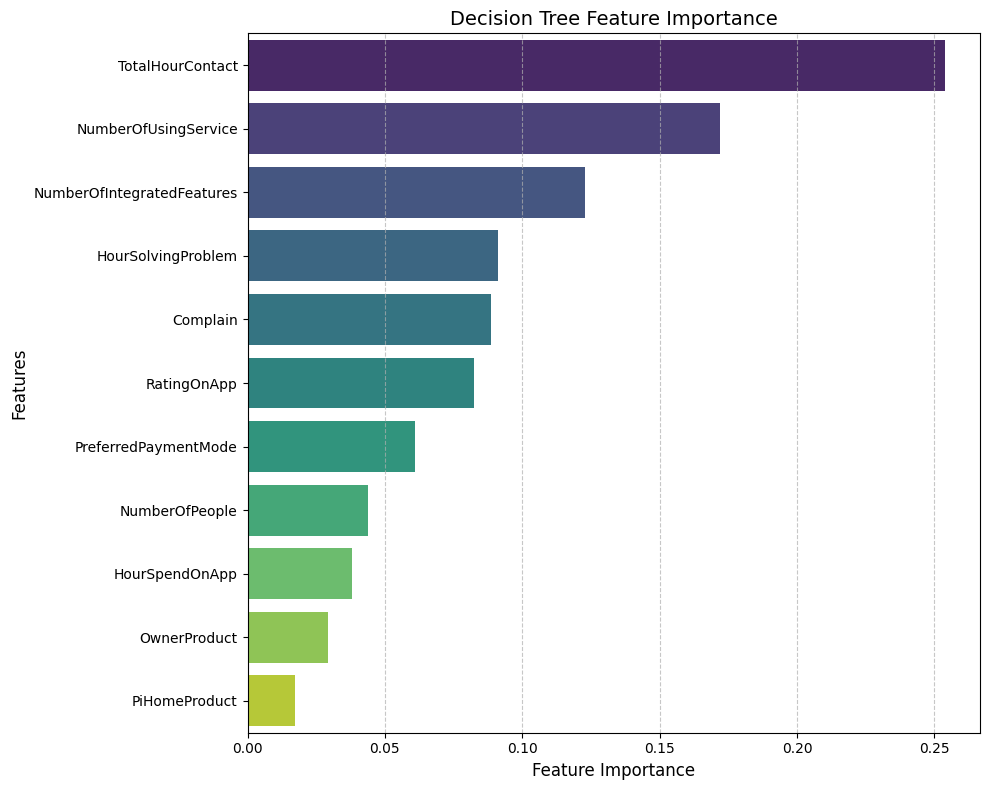

In [50]:
# Lấy feature importance từ mô hình XGBoost
importances = DT.best_estimator_.feature_importances_
df_feature_importance = pd.DataFrame(
    importances,
    index=X_train.columns,
    columns=['Feature Importance']
).sort_values('Feature Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Feature Importance', 
    y=df_feature_importance.index, 
    data=df_feature_importance, 
    palette='viridis'
)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Decision Tree Feature Importance', fontsize=14)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
tp, fp, fn, tn= confusion_matrix(y_test, DT_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  241
False Positives:  152
False Negatives:  114
True Positives:  1182


In [44]:
dt_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
dt_creditworthy=round(tp/(tp+fp), 2)
dt_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Decision Tree is {:0.2f}%".format(dt_acc))
dt_creditworthy, dt_NonCreditworthy

The percentage Accuracy of Decision Tree is 0.84%


(0.89, 0.68)

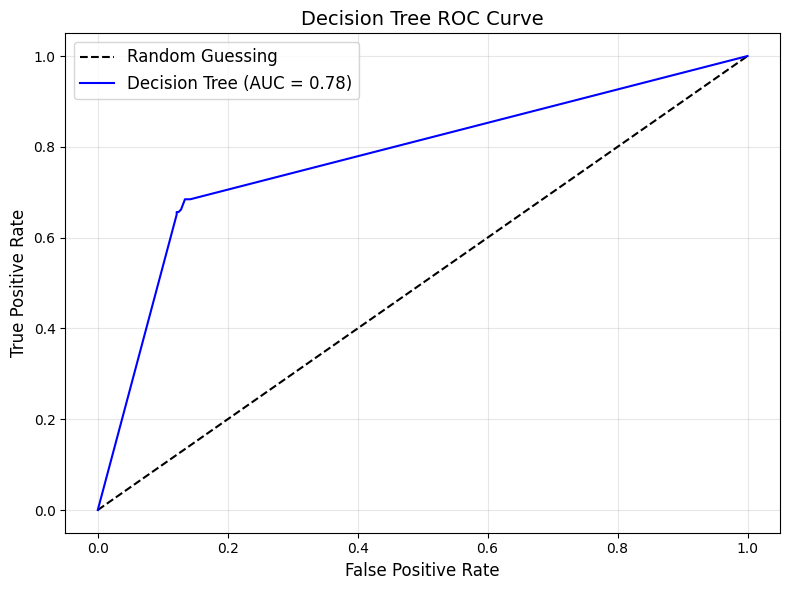

AUC (Area Under the Curve): 0.7759


In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Lấy mô hình tốt nhất từ GridSearchCV
best_decision_tree = DT.best_estimator_

# Tính xác suất dự đoán trên tập test
y_pred_prob = best_decision_tree.predict_proba(X_test)[:, 1]

# Tính FPR, TPR và thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Tính AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc:.2f})', color='b')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Decision Tree ROC Curve', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# In giá trị AUC
print(f"AUC (Area Under the Curve): {auc:.4f}")


### XG Boost


In [45]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
# Create GridSearchCV
XGB = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
XGB.fit(X_train, y_train)

best_params = XGB.best_params_

best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

XGB_pred = best_xgb_classifier.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, XGB_pred))

# Evaluate the model
XGB_SC = accuracy_score(y_test, XGB_pred)
print(f"{round(XGB_SC*100,2)}% Accurate")
print("Best Hyperparameters:", best_params)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1334
           1       0.72      0.65      0.68       355

    accuracy                           0.87      1689
   macro avg       0.82      0.79      0.80      1689
weighted avg       0.87      0.87      0.87      1689

87.39% Accurate
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


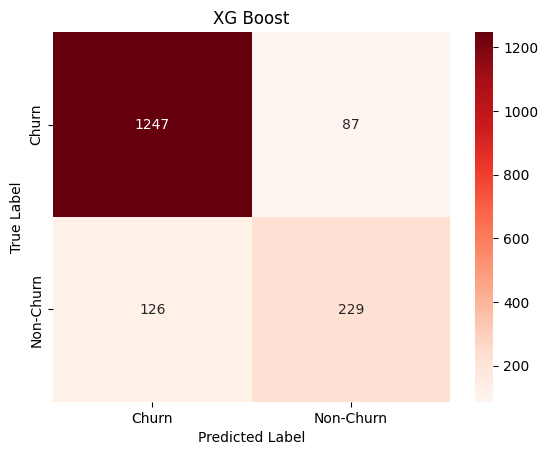

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, XGB_pred, labels=[False, True])

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Churn','Non-Churn'],
            yticklabels=['Churn','Non-Churn'])

plt.title('XG Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

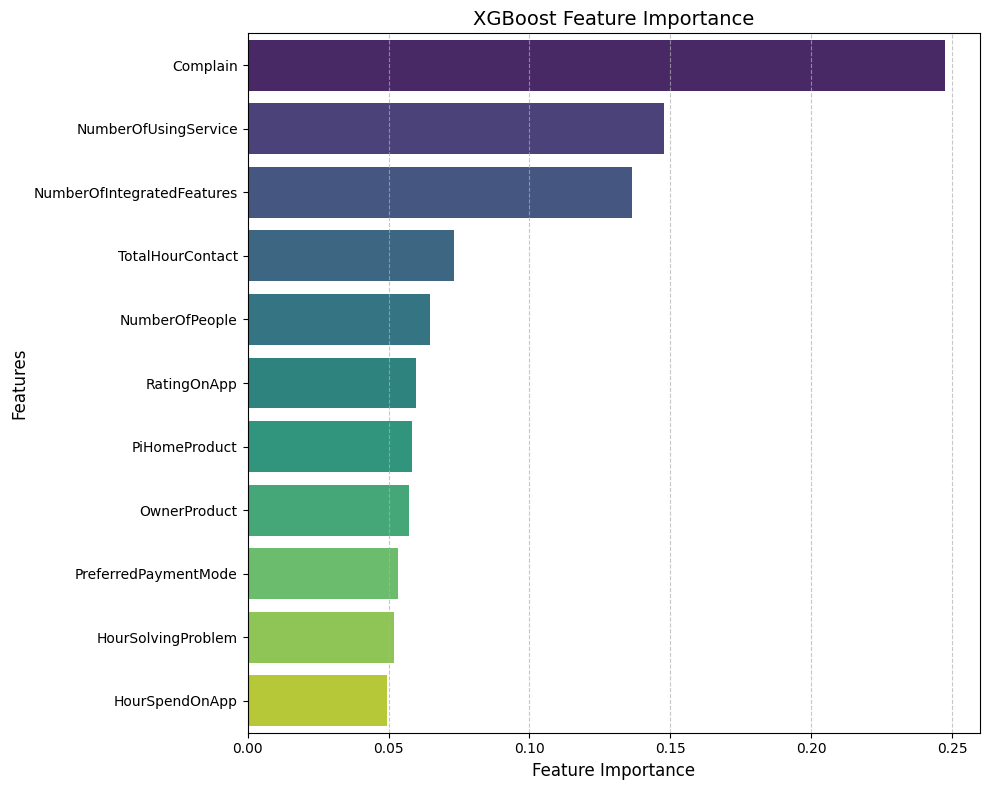

In [47]:
# Lấy feature importance từ mô hình XGBoost
importances = XGB.best_estimator_.feature_importances_
df_feature_importance = pd.DataFrame(
    importances,
    index=X_train.columns,
    columns=['Feature Importance']
).sort_values('Feature Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Feature Importance', 
    y=df_feature_importance.index, 
    data=df_feature_importance, 
    palette='viridis'
)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('XGBoost Feature Importance', fontsize=14)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

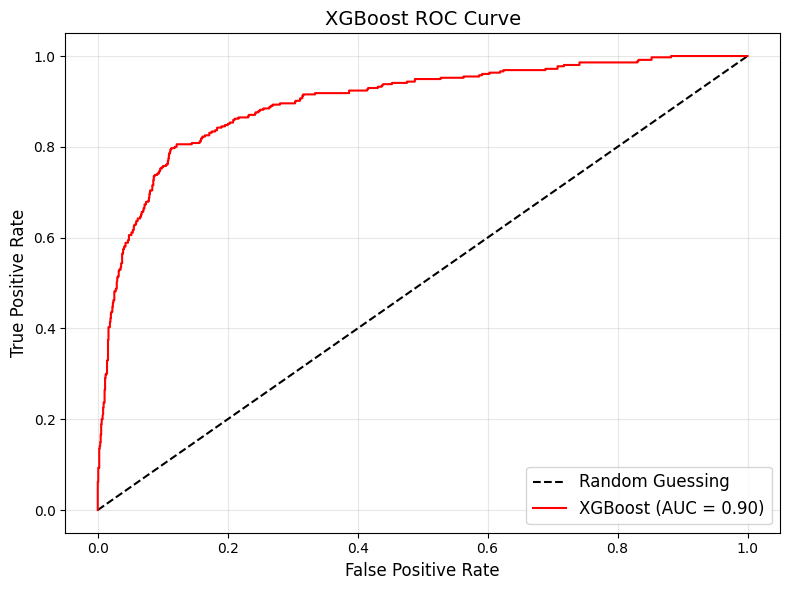

AUC (Area Under the Curve): 0.8991


In [57]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Lấy mô hình tốt nhất từ GridSearchCV
best_xgb_classifier = XGB.best_estimator_

# Tính xác suất dự đoán trên tập test
y_pred_prob = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Tính FPR, TPR và thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Tính AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})', color='r')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XGBoost ROC Curve', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# In giá trị AUC
print(f"AUC (Area Under the Curve): {auc:.4f}")


In [49]:
# Dự đoán với mô hình XGBoost
y_pred_xgb = best_xgb_classifier.predict(X)

# Đếm số lượng Exited (1) và Not Exited (0) trong kết quả thực tế
actual_counts_xgb = np.bincount(y)

# Đếm số lượng Exited (1) và Not Exited (0) trong kết quả dự đoán
predicted_counts_xgb = np.bincount(y_pred_xgb)

# Hiển thị kết quả
print("Kết quả thực tế (XGBoost):")
print(f"Not Exited (0): {actual_counts_xgb[0]} - Exited (1): {actual_counts_xgb[1]}")

print("\nKết quả dự đoán (XGBoost):")
print(f"Not Exited (0): {predicted_counts_xgb[0]} - Exited (1): {predicted_counts_xgb[1]}")


Kết quả thực tế (XGBoost):
Not Exited (0): 4446 - Exited (1): 1184

Kết quả dự đoán (XGBoost):
Not Exited (0): 4478 - Exited (1): 1152
